# Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


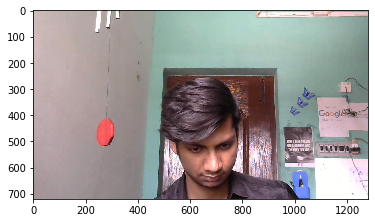

In [2]:
img = cv2.imread(r"C:\Users\MD\Documents\Python Scripts\lockdown #1\src\img\MD.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

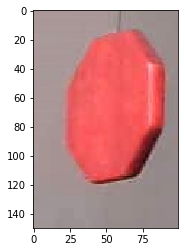

In [3]:
temp = img[400:550,220:320]
plt.imshow(temp)

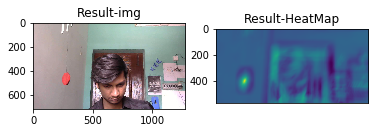

In [4]:
res = cv2.matchTemplate(img,temp,cv2.TM_CCOEFF)

cimg = img.copy()

minv,maxv,minl,maxl = cv2.minMaxLoc(res)

topLeft = maxl

h,w,c = temp.shape

bottomCornor = (topLeft[0]+w,topLeft[1]+h)

cv2.rectangle(img,topLeft,bottomCornor,(0,0,255),10)

plt.subplot(121)
plt.imshow(cimg)
plt.title("Result-img")
plt.subplot(122)
plt.title("Result-HeatMap")
plt.imshow(res)
plt.xticks([])
plt.yticks()
#plt.suptitle("Match")
plt.show()

## Cornor Detection-Harris cornor Detefction

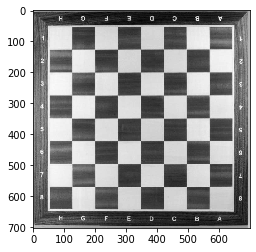

In [5]:
fchess = cv2.imread(r"C:\Users\MD\Documents\Python Scripts\lockdown #1\src\img\fchess.jpg")
fgray = cv2.cvtColor(fchess,cv2.COLOR_BGR2GRAY)
#_,fgray = cv2.threshold(fchess,127,255,cv2.THRESH_TOZERO)
fgray = np.float32(fgray)
plt.imshow(fgray,"gray")

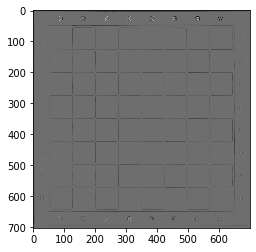

In [6]:
res = cv2.cornerHarris(fgray,2,5,0.04)
plt.imshow(res,"gray")

In [7]:
res = cv2.dilate(res,(3,3))
#plt.imshow(res,"gray")

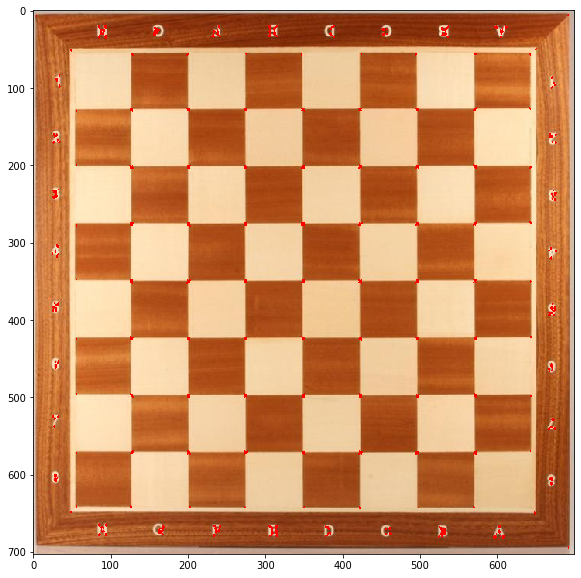

In [8]:
fchess[res>0.01*res.max()]=[0,0,255]
fchess = cv2.cvtColor(fchess,cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(fchess)

In [9]:
import cv2
import numpy as np

filename = r"C:\Users\MD\Documents\Python Scripts\lockdown #1\src\img\fchess.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## Shi-Tomaci Cornor Detection

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

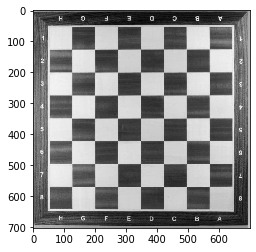

In [11]:
img  = cv2.imread(r"C:\Users\MD\Documents\Python Scripts\lockdown #1\src\img\fchess.jpg",0)
plt.imshow(img,"gray")

In [27]:
cors = np.int0(cv2.goodFeaturesToTrack(img,3,0.01,15))
cors

array([[[220,  20]],

       [[586, 684]],

       [[216,  39]]], dtype=int64)

In [28]:
for i in cors:
    x,y = i.ravel()
    cv2.circle(img,(x,y),10,(255,100,255),-1)

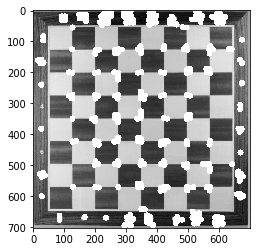

In [29]:
plt.imshow(img,"gray")


## Edge Detection

In [1]:
import cv2
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
cap = cv2.VideoCapture(0)

while True:
    
    ros,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    can = cv2.Canny(gray,100,200)
    cv2.imshow("L2R",can)
    
    if cv2.waitKey(1) & 0xFF ==27:
        break
    
cap.release()
cv2.destroyAllWindows()

## Contour Detection

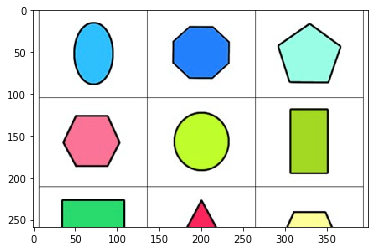

In [2]:
img = cv2.imread(r"C:\Users\MD\Documents\Python Scripts\lockdown #1\src\img\shapes.jpg")
plt.imshow(img,"gray")

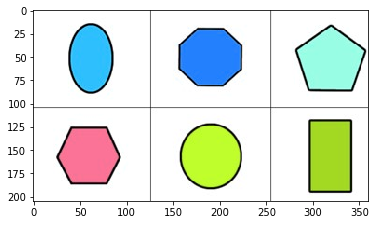

In [4]:
cimg = img[0:205,10:370]
plt.imshow(cimg,"gray")

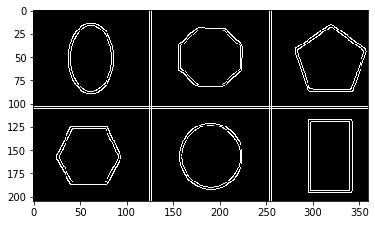

In [8]:
gray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray,100,200)
plt.imshow(edge,"gray")

In [29]:
con,hira = cv2.findContours(edge,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
len(con)

27

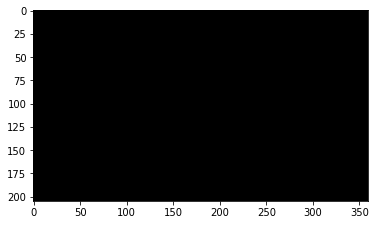

In [30]:
dra = np.zeros(cimg.shape,int)
plt.imshow(dra,"gray")

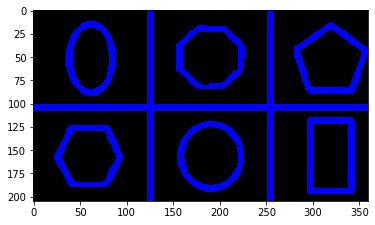

In [31]:
dra = cv2.drawContours(dra,con,-1,(0,0,255),3)
plt.imshow(dra,"gray")